## Understanding the problem
#### You were hired by Multiplan (Shopping Centers Manager) as Data Analyst. Your first task is generate insights which help administrators having an overview about shopping visitors based on income and score.

#### Importing Libraries

In [1]:
# Data analyst library
import pandas as pd 

# Data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

#### Collecting Data

One professional from data sector has accomplished the data extraction straight from Bank and provided you a csv format dataset containing relevant variables and may be useful to answer these questions.


- CustomerID - Visitor ID
- Genre - Visitor gender
- Age - Visitor age
- Annual Income (kR$) - Visitor anuual income
- Spending Score (1-100) - Visitor Score

In [4]:
df = pd.read_csv("../dados/clientes_shopping.csv")

In [5]:
df.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [6]:
df.tail(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.drop(columns=['CustomerID'], inplace=True)

In [9]:
df.shape

(200, 4)

In [10]:
lines, columns = df.shape

In [11]:
print(f"Number of visitors according to available dataset is: {lines}")

Number of visitors according to available dataset is: 200


#### Statistical Information

In [12]:
df.describe().round(2)

,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00
mean,38.85,60.56,50.20
std,13.97,26.26,25.82
min,18.00,15.00,1.00
25%,28.75,41.50,34.75
50%,36.00,61.50,50.00
75%,49.00,78.00,73.00
max,70.00,137.00,99.00


#### Missing Data

In [13]:
df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Duplicates

In [14]:
df[df.duplicated()]

,Genre,Age,Annual Income (k$),Spending Score (1-100)


In [15]:
df.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

#### Genre - shopping visitor gender


In [17]:
df['Genre'].nunique()

2

In [18]:
df['Genre'].unique()

array(['Male', 'Female'], dtype=object)

#### How many of these visitors are male or female?

In [19]:
df['Genre'].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

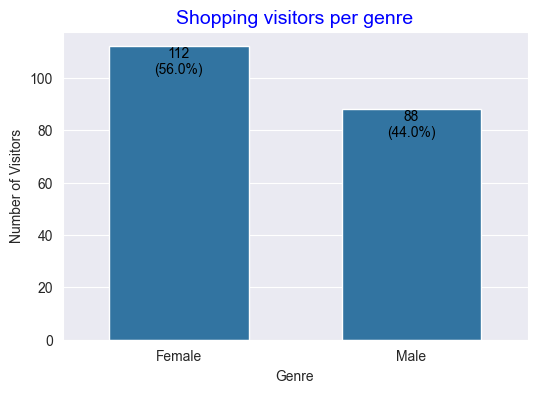

In [29]:
# Calculating counts and percentages
total = df['Genre'].value_counts()
total_general = total.sum()
percentual = (total / total_general) * 100

# Creating counting chart
plt.figure(figsize=(6, 4))
plt.title("Shopping visitors per genre", fontsize=14, color='blue')

# Defining the order of genre on grath to "Female" appears before "Male"
order = ['Female','Male']

# Creating bar chart with Seaborn
ax = sns.countplot(x='Genre', data=df, order=order, width=0.6)

# Adding numbers and percentages on bars
for bar, genre in zip(ax.patches, total.index):
    value = total[genre]
    percent = percentual[genre]
    height = bar.get_height()

    # Adding numbers and percentage above the bar
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position (bar center)
        height,  # Y position a bit below the bar
        f'{value}\n({percent:.1f}%)',  # Number of visitors and percentage
        ha='center', fontsize=10, color='black', va='top'  # Text style
    )

# Adjusting the axis labels 
ax.set_xlabel("Genre", fontsize=10)
ax.set_ylabel("Number of Visitors", fontsize=10)

# Exhibit the graph
plt.show()

Conclusion: female clients are more in numbers than male clients.

Age - visitor age in the shopping mall

In [23]:
df['Age'].nunique()

51

In [24]:
df['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [25]:
df['Age'].value_counts()

Age
32    11
35     9
31     8
19     8
30     7
49     7
23     6
40     6
36     6
27     6
47     6
38     6
50     5
20     5
21     5
29     5
48     5
34     5
67     4
54     4
24     4
59     4
18     4
28     4
22     3
25     3
46     3
43     3
39     3
60     3
45     3
37     3
33     3
68     3
58     2
41     2
52     2
57     2
65     2
53     2
51     2
42     2
70     2
44     2
26     2
63     2
66     2
64     1
69     1
55     1
56     1
Name: count, dtype: int64

In [26]:
df['Age'].describe().round(1)

count    200.0
mean      38.8
std       14.0
min       18.0
25%       28.8
50%       36.0
75%       49.0
max       70.0
Name: Age, dtype: float64

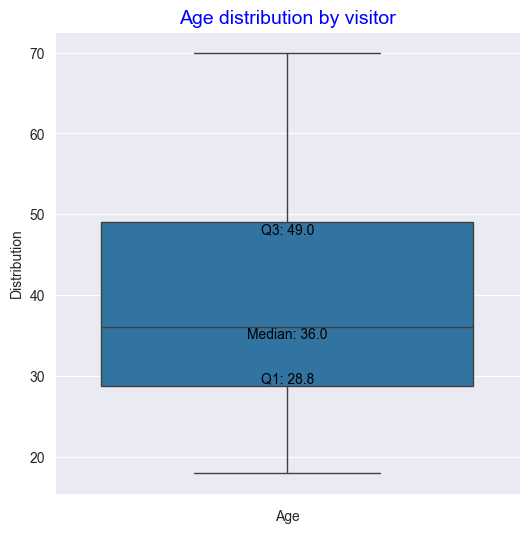

In [ ]:
# Creating boxplot
plt.figure(figsize=(6, 6))
plt.title("Age distribution by visitor", fontsize=14, color='Blue')
plt.xlabel('Age', fontsize=10)
plt.ylabel('Distribution', fontsize=10)

ax = sns.boxplot(data=df, y='Age')

# Calculating the boxplot values
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
median = df['Age'].median()

# Adding values to Q1, Q3 and median
# As the graph is vertical, coordinates Y are variables and coordinates X are 0
ax.text(0, Q1, f'Q1: {Q1:.1f}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')
ax.text(0, Q3, f'Q3: {Q3:.1f}', horizontalalignment='center', verticalalignment='top', fontsize=10, color='black')
ax.text(0, median, f'Median: {median:.1f}', horizontalalignment='center', verticalalignment='top', fontsize=10, color='black')

# Exhibit the graph
plt.show()

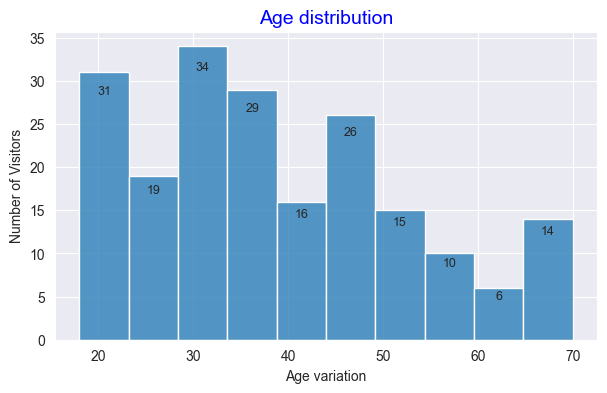

In [33]:
# Creating figsize, title and labels 
plt.figure(figsize=(7, 4))
plt.title("Age distribution", fontsize=14, color='Blue')
plt.xlabel('Age variation', fontsize=10)
plt.ylabel('Number of Visitors', fontsize=10)

# Creating histogram with density
ax = sns.histplot(df['Age'], kde=False, stat='count', bins=10)

# Adding the labels of adjusted density
for patch in ax.patches:
    altura = patch.get_height()  # bar height (density)
    if altura > 0:  # Avoid labels with empty bars
        ax.text(patch.get_x() + patch.get_width() / 2,  # bar center
                                altura - (altura * 0.05),  # fit to stay a bit below of the top
                f'{altura:.0f}',  # density value with two decimal places
                ha='center', va='top', fontsize=9)

plt.show()

#### Conclusion: there are clients with a range of ages.

#### Annual Income (k$)


In [30]:
df['Annual Income (k$)'].nunique()

64

In [31]:
df['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137])

In [32]:
df['Annual Income (k$)'].describe().round(1)

count    200.0
mean      60.6
std       26.3
min       15.0
25%       41.5
50%       61.5
75%       78.0
max      137.0
Name: Annual Income (k$), dtype: float64

Text(0, 61.5, 'Median: 61.5')

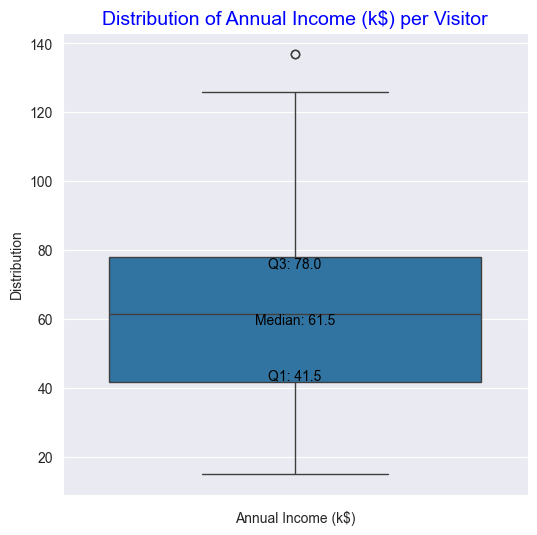

In [34]:
# Creating boxplot
plt.figure(figsize=(6, 6))
plt.title("Distribution of Annual Income (k$) per Visitor", fontsize=14, color='Blue')
plt.xlabel('Annual Income (k$)', fontsize=10)
plt.ylabel('Distribution', fontsize=10)

ax = sns.boxplot(data=df, y='Annual Income (k$)')

# Calculating the boxplot values
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
median = df['Annual Income (k$)'].median()

# Adding labels to Q1, Q3 e a median
ax.text(0, Q1, f'Q1: {Q1:.1f}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')
ax.text(0, Q3, f'Q3: {Q3:.1f}', horizontalalignment='center', verticalalignment='top', fontsize=10, color='black')
ax.text(0, median, f'Median: {median:.1f}', horizontalalignment='center', verticalalignment='top', fontsize=10, color='black')

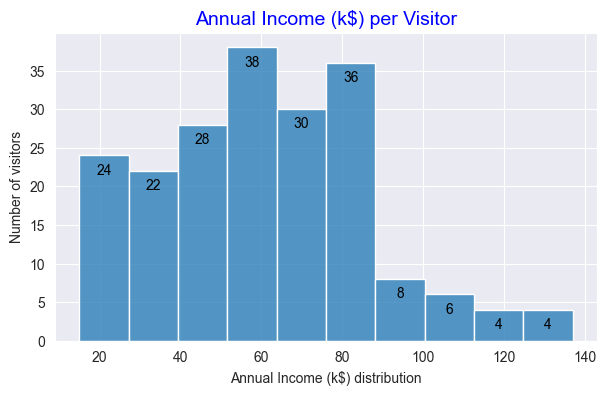

In [35]:
# Creating figsize, title and axis labels
plt.figure(figsize=(7, 4))
plt.title("Annual Income (k$) per Visitor", fontsize=14, color='Blue')
plt.xlabel('Annual Income (k$) distribution', fontsize=10)
plt.ylabel('Number of visitors', fontsize=10)

# Creating histogram with Seaborn
ax = sns.histplot(df['Annual Income (k$)'], bins=10, kde=False)

# Adding the labels of numbers of visitors on bars 
for patch in ax.patches:
    altura = patch.get_height()
    largura = patch.get_width()
    x = patch.get_x() + largura / 2  # X position (bar center)
    y = altura  - 1# Posição Y (bar height)
    
    # Adding the labels of number of visitors
    ax.text(x, y, f'{int(altura)}', ha='center', va='top', fontsize=10, color='black')

# Exhibit the graph
plt.show()

#### Conclusion: biggest part of annual income stays between 50k and 85k.


In [37]:
df['Spending Score (1-100)'].nunique()

84

In [38]:
df['Spending Score (1-100)'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18])

In [39]:
df['Spending Score (1-100)'].describe().round(1)

count    200.0
mean      50.2
std       25.8
min        1.0
25%       34.8
50%       50.0
75%       73.0
max       99.0
Name: Spending Score (1-100), dtype: float64

Text(0, 50.0, 'Median: 50.0')

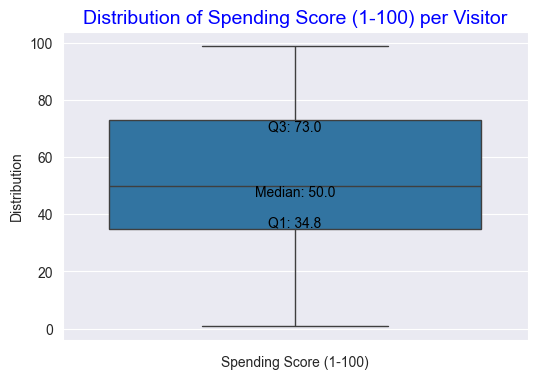

In [40]:
# Creating boxplot
plt.figure(figsize=(6, 4))
plt.title("Distribution of Spending Score (1-100) per Visitor", fontsize=14, color='Blue')
plt.xlabel('Spending Score (1-100)', fontsize=10)
plt.ylabel('Distribution', fontsize=10)

ax = sns.boxplot(data=df, y='Spending Score (1-100)')

# Calculating boxplot values
Q1 = df['Spending Score (1-100)'].quantile(0.25)
Q3 = df['Spending Score (1-100)'].quantile(0.75)
median = df['Spending Score (1-100)'].median()

# Adding labels to Q1, Q3 and median
ax.text(0, Q1, f'Q1: {Q1:.1f}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')
ax.text(0, Q3, f'Q3: {Q3:.1f}', horizontalalignment='center', verticalalignment='top', fontsize=10, color='black')
ax.text(0, median, f'Median: {median:.1f}', horizontalalignment='center', verticalalignment='top', fontsize=10, color='black')

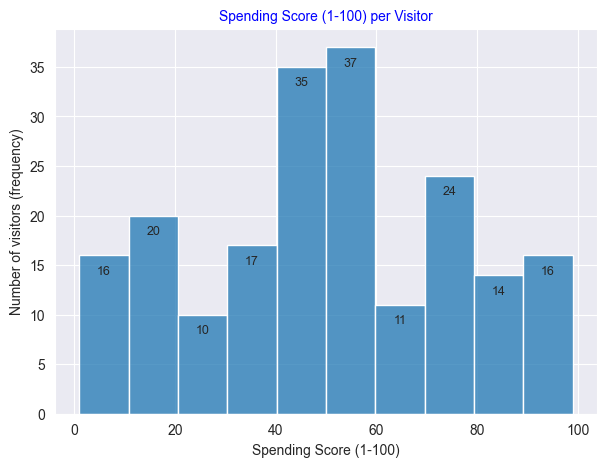

In [42]:
# Creating figsize, title and axis labels
plt.figure(figsize=(7, 5))
plt.title("Spending Score (1-100) per Visitor", fontsize=10, color='Blue')
plt.xlabel('Spending Score (1-100)', fontsize=10)
plt.ylabel('Number of visitors (frequency)', fontsize=10)

# Creating histogram
ax = sns.histplot(df['Spending Score (1-100)'], bins=10)

# Adding frequency labels above each bar
for patch in ax.patches:
    height = patch.get_height()  # bar height
    if height > 0:  # Avoid labels on empty bars
        ax.text(patch.get_x() + patch.get_width() / 2,  # bar center
                height - 1,  # height label
                int(height),  # frequency label
                ha='center', va='top', fontsize=9)

plt.show()

Conclusion: most of clients has score between 40 and 60.

#### How the variables are related to each other?

In [45]:
# Select only the numeric variables
df_numeric = df.select_dtypes(include='number')

# Calculating the correlation matrix
df_numeric.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

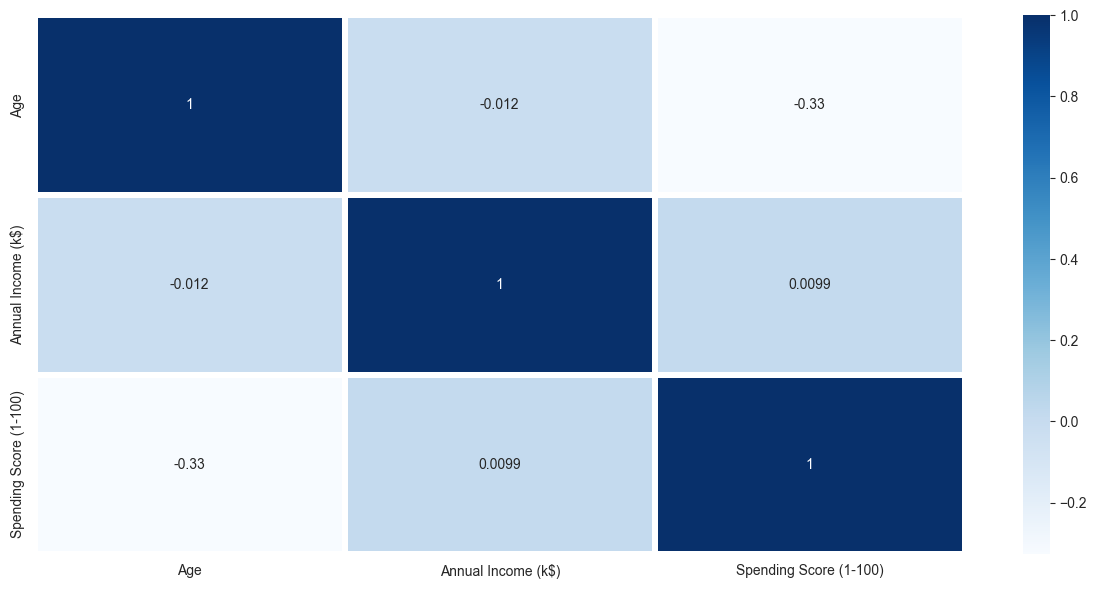

In [46]:
plt.figure(figsize=(15,7))
sns.heatmap(df_numeric.corr(),cmap='Blues', annot=True, linewidth=3 )

#### How does age vary in relation to genre?

In [48]:
df.groupby('Genre')['Age'].mean()

Genre
Female    38.098214
Male      39.806818
Name: Age, dtype: float64

<Axes: xlabel='Genre', ylabel='Age'>

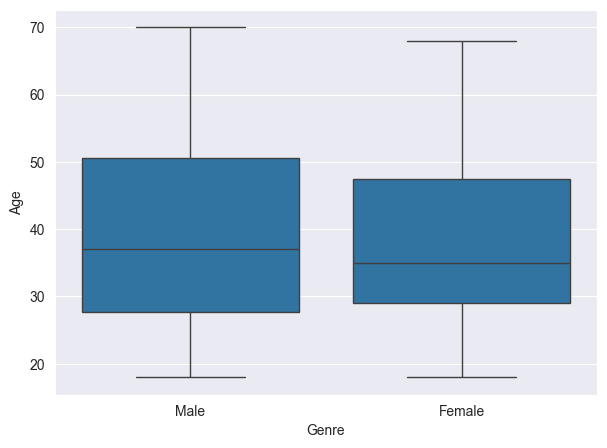

In [50]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Genre', y='Age',data=df)

Conclusion: the male public has a greater variation in income, both in the interquartile range and among the outliers.

#### How does income vary by gender?


In [53]:
df.groupby('Genre')['Annual Income (k$)'].mean()

Genre
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64

<Axes: xlabel='Genre', ylabel='Annual Income (k$)'>

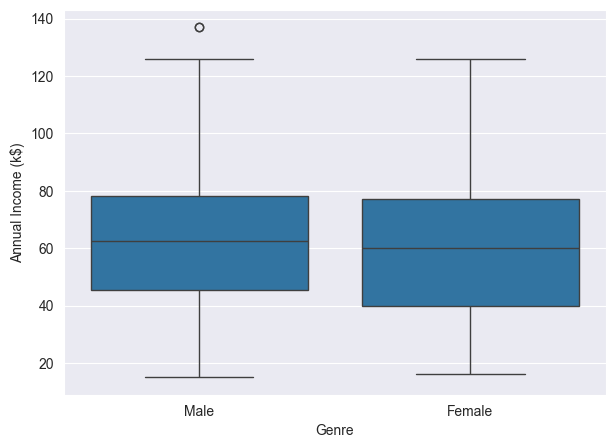

In [54]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Genre', y='Annual Income (k$)',data=df)

Conclusion: while the male audience has income among the outliers, the female audience has greater variability among the interquartile range.

#### Como a renda varia em relação a idade?


In [56]:
df.groupby('Age')['Annual Income (k$)'].mean()

Age
18     51.250000
19     57.000000
20     41.600000
21     38.800000
22     31.333333
23     41.500000
24     39.250000
25     57.666667
26     58.000000
27     63.166667
28     85.250000
29     63.600000
30     76.142857
31     48.375000
32     87.181818
33     80.333333
34     79.000000
35     46.666667
36     81.000000
37     65.000000
38     74.500000
39     72.666667
40     61.666667
41    101.000000
42     60.000000
43     65.666667
44     75.500000
45     69.333333
46     59.000000
47     70.166667
48     58.200000
49     51.000000
50     58.600000
51     55.500000
52     55.500000
53     39.500000
54     59.750000
55     57.000000
56     79.000000
57     64.500000
58     54.000000
59     65.250000
60     43.333333
63     56.500000
64     19.000000
65     50.500000
66     63.000000
67     45.500000
68     56.666667
69     44.000000
70     47.500000
Name: Annual Income (k$), dtype: float64

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

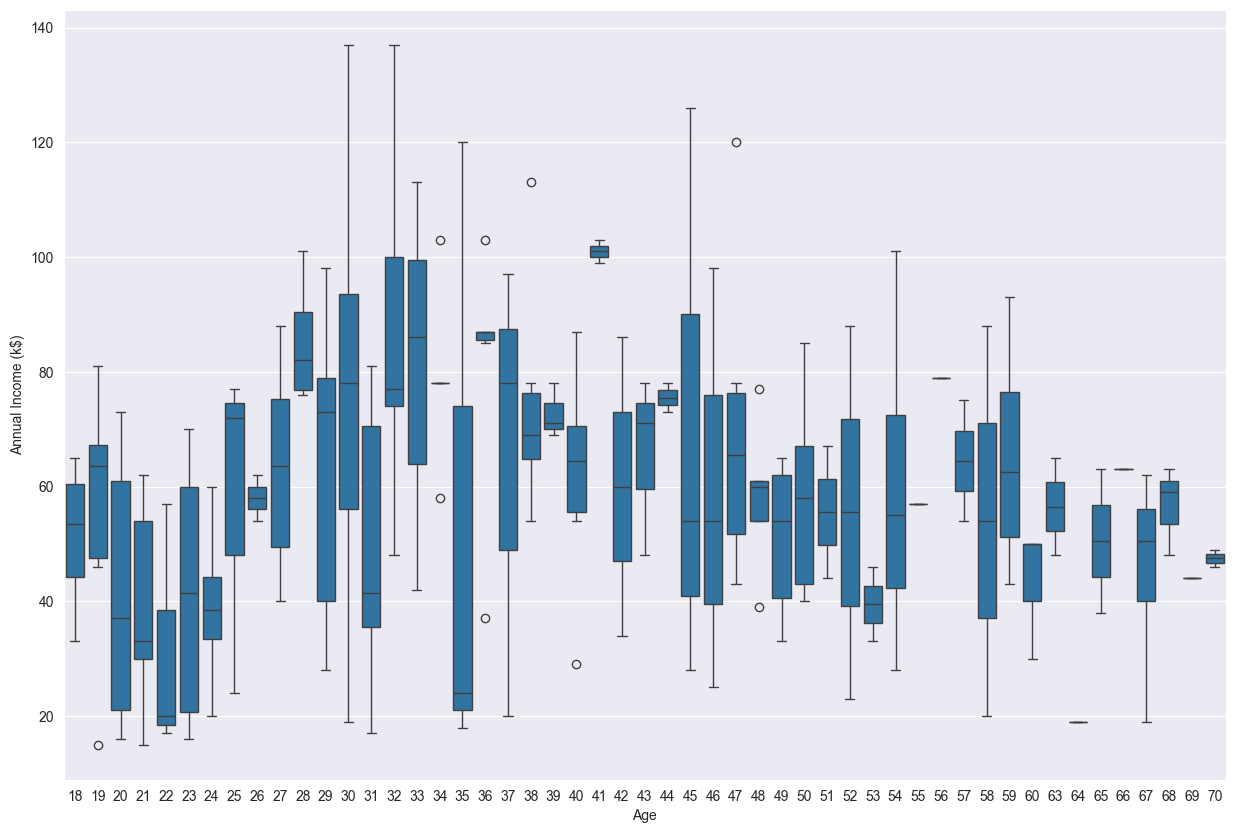

In [57]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Age', y='Annual Income (k$)',data=df)